In [1]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from DaskProfileReader import *

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

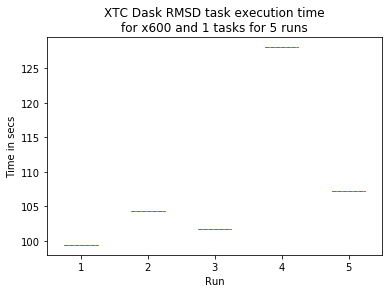

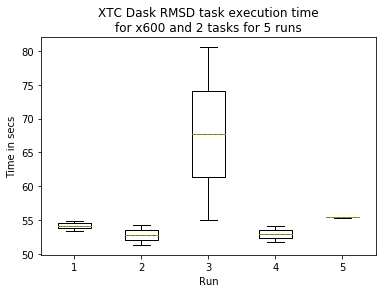

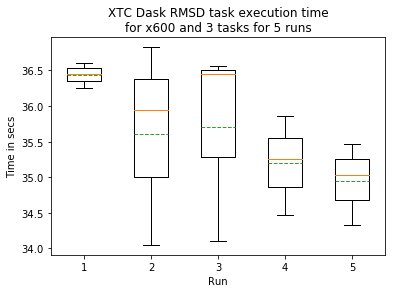

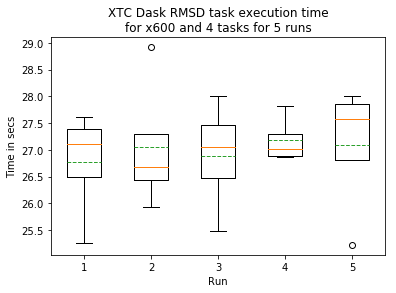

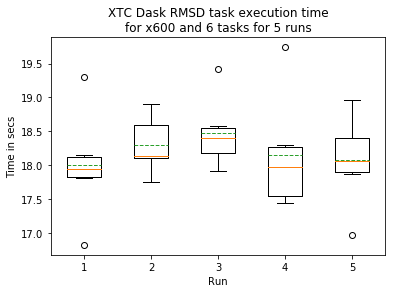

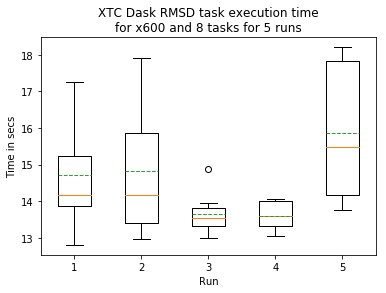

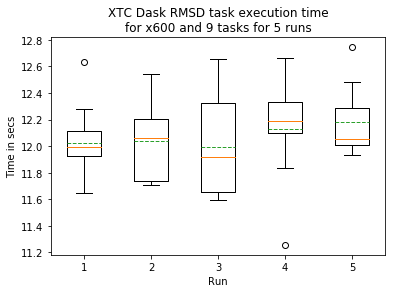

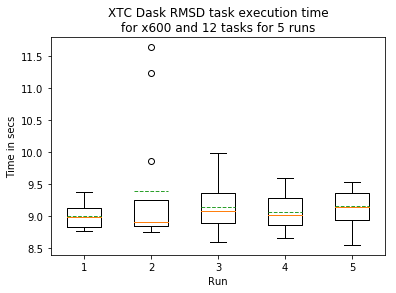

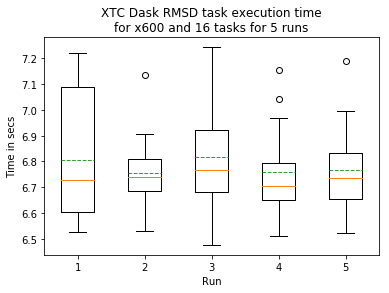

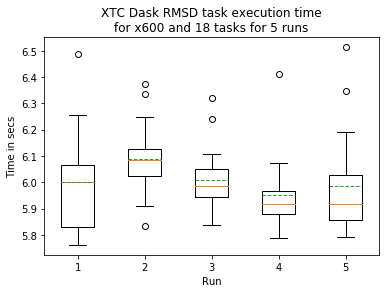

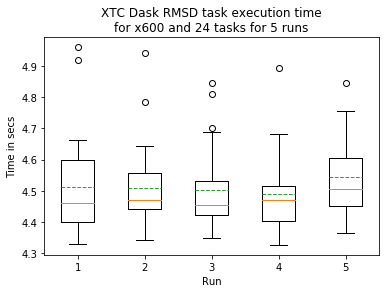

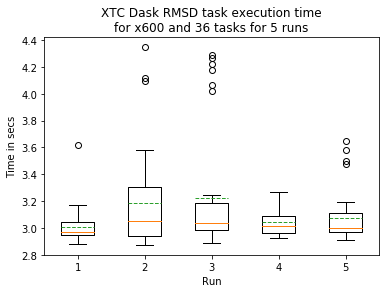

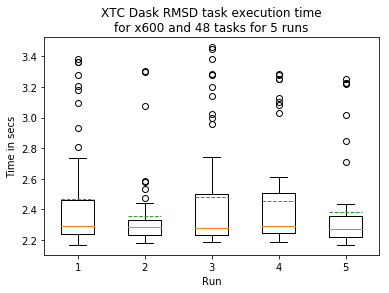

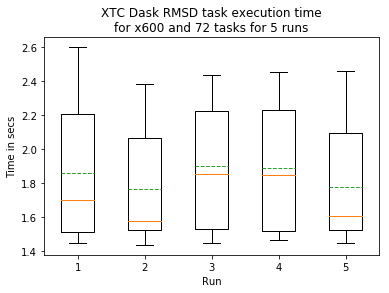

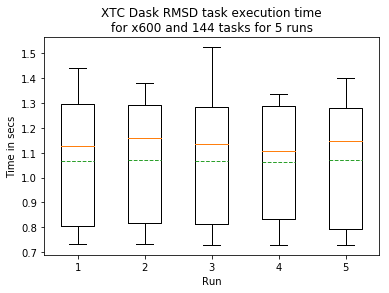

In [2]:
block_size = [1,2,3,4,6,8,9,12,16,18,24,36,48,72,144]

for block in block_size:
    data1 = DaskProfileReader('stragglers/stragglers_test_600_%d_1.txt'%(block))
    data1 = data1[data1['name']=='block_rmsd']['duration'].values/1000
    data2 = DaskProfileReader('stragglers/stragglers_test_600_%d_2.txt'%(block))
    data2 = data2[data2['name']=='block_rmsd']['duration'].values/1000
    data3 = DaskProfileReader('stragglers/stragglers_test_600_%d_3.txt'%(block))
    data3 = data3[data3['name']=='block_rmsd']['duration'].values/1000
    data4 = DaskProfileReader('stragglers/stragglers_test_600_%d_4.txt'%(block))
    data4 = data4[data4['name']=='block_rmsd']['duration'].values/1000
    data5 = DaskProfileReader('stragglers/stragglers_test_600_%d_5.txt'%(block))
    data5 = data5[data5['name']=='block_rmsd']['duration'].values/1000
    fig,axes=plt.subplots(nrows=1,ncols=1,sharex=True)
    axes.boxplot([data1,data2,data3,data4,data5],showfliers=True,showmeans=True,meanline=True)
    axes.set_title('XTC Dask RMSD task execution time\nfor x600 and %d tasks for 5 runs'%(block))
    axes.set_xlabel('Run')
    axes.set_ylabel('Time in secs')